In [71]:
from ROOT import TCanvas

In [72]:
import ROOT

In [73]:
import uproot

In [74]:
import pandas as pd

In [75]:
import numpy as np

In [76]:
import os

In [77]:
import matplotlib.pyplot as plt

In [78]:
from IPython.display import Image,display

In [79]:
PUs = np.arange(40,75,5)

In [134]:
theData = pd.read_csv("sizes",delimiter=" ",names=["PU","events","file_size","setup","dummy","compressed","uncompressed"])

In [135]:
theData = theData.drop("dummy",axis=1)

In [136]:
theData["PU"] = theData["PU"].astype(float)
theData["compressed"] = theData["compressed"].astype(float)
theData["uncompressed"] = theData["uncompressed"].astype(float)
theData["file_size"] = theData["file_size"].astype(float)

In [137]:
theData.loc[theData["setup"]=="miniaod_1","setup"] = "mini1"
theData.loc[theData["setup"]=="miniaod_2","setup"] = "mini2"
theData.loc[theData["setup"]=="miniaod_original","setup"] = "minioriginal"

In [138]:
cutA = theData["setup"]=="aod"
cut0 = theData["setup"]=="mini0"
cut1 = theData["setup"]=="mini1"
cut2 = theData["setup"]=="mini2"
cutoriginal = theData["setup"]=="minioriginal"

In [139]:
theData.head(n=100)

,PU,events,file_size,setup,compressed,uncompressed
0,40.0,1070,521418551.0,aod,NaN,NaN
1,40.0,1070,81543465.0,mini0,154328.0,32292.3
2,40.0,1070,76386371.0,mini1,154347.0,27441.8
3,40.0,1070,79558885.0,mini2,154326.0,30511.6
4,40.0,1070,75255982.0,minioriginal,154356.0,26311.0
5,45.0,1069,548113159.0,aod,NaN,NaN
6,45.0,1069,84737523.0,mini0,163374.0,34628.3
7,45.0,1069,79110957.0,mini1,163402.0,29326.6
8,45.0,1069,82698643.0,mini2,163376.0,32678.7
9,45.0,1069,77842249.0,minioriginal,163401.0,28074.7


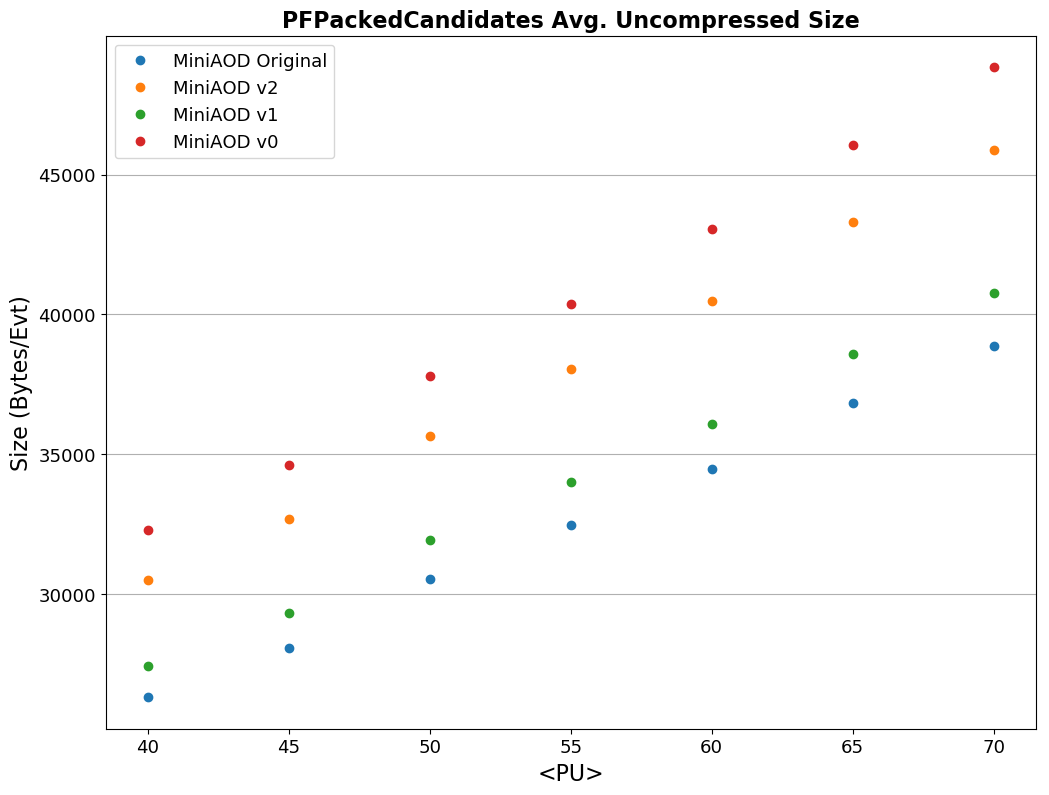

In [161]:
plt.plot(theData[cutoriginal]["PU"].values,theData[cutoriginal]["uncompressed"].values,"o",label="MiniAOD Original")
plt.plot(theData[cut2]["PU"].values,theData[cut2]["uncompressed"].values,"o",label="MiniAOD v2")
plt.plot(theData[cut1]["PU"].values,theData[cut1]["uncompressed"].values,"o",label="MiniAOD v1")
plt.plot(theData[cut0]["PU"].values,theData[cut0]["uncompressed"].values,"o",label="MiniAOD v0")

plt.legend(fontsize=13)

plt.title("PFPackedCandidates Avg. Uncompressed Size",fontsize=16,fontweight="bold")

plt.xlabel("<PU>",fontsize=16)
plt.ylabel("Size (Bytes/Evt)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y")
ax = plt.gca()


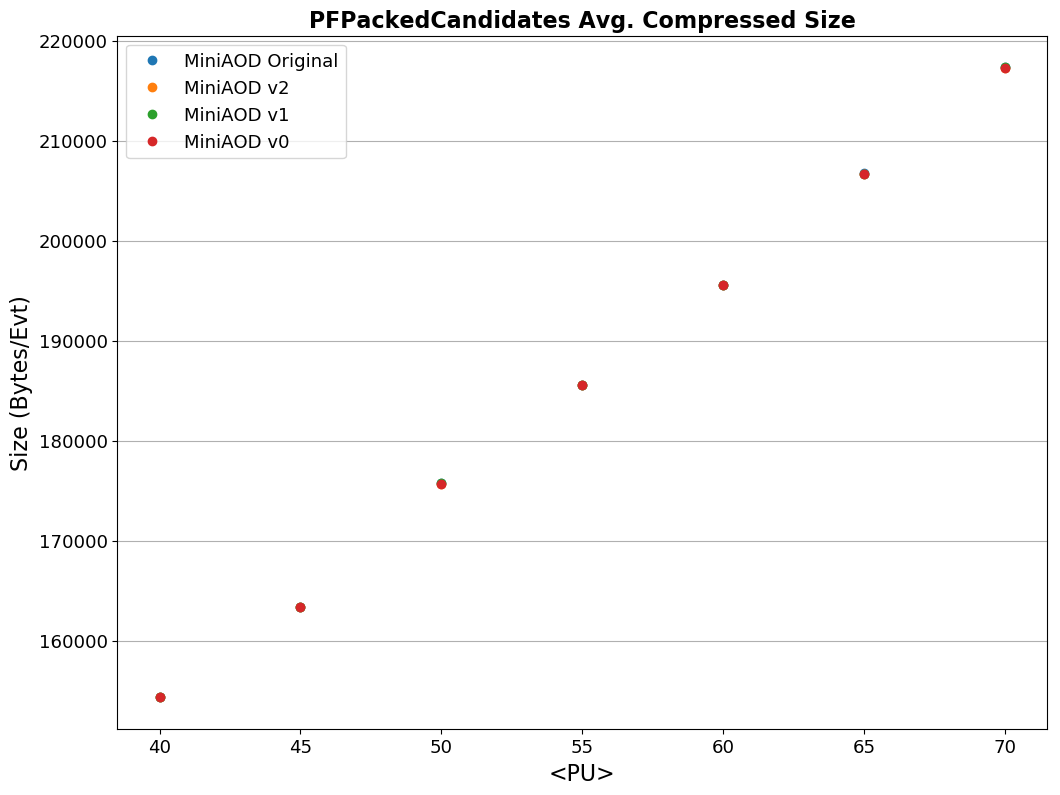

In [162]:
plt.plot(theData[cutoriginal]["PU"].values,theData[cutoriginal]["compressed"].values,"o",label="MiniAOD Original")
plt.plot(theData[cut2]["PU"].values,theData[cut2]["compressed"].values,"o",label="MiniAOD v2")
plt.plot(theData[cut1]["PU"].values,theData[cut1]["compressed"].values,"o",label="MiniAOD v1")
plt.plot(theData[cut0]["PU"].values,theData[cut0]["compressed"].values,"o",label="MiniAOD v0")

plt.title("PFPackedCandidates Avg. Compressed Size",fontsize=16,fontweight="bold")

plt.legend(fontsize=13)

plt.xlabel("<PU>",fontsize=16)
plt.ylabel("Size (Bytes/Evt)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y")
ax = plt.gca()


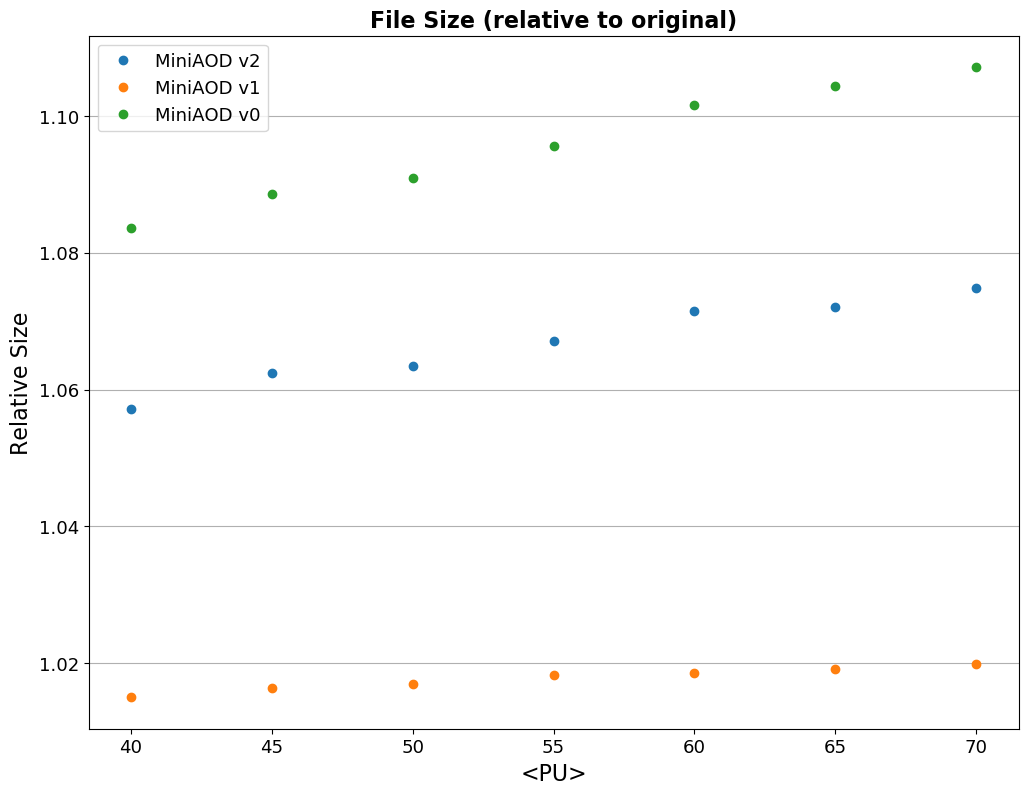

In [163]:
plt.plot(theData[cut2]["PU"].values,theData[cut2]["file_size"].values/theData[cutoriginal]["file_size"].values,"o",label="MiniAOD v2")
plt.plot(theData[cut1]["PU"].values,theData[cut1]["file_size"].values/theData[cutoriginal]["file_size"].values,"o",label="MiniAOD v1")
plt.plot(theData[cut0]["PU"].values,theData[cut0]["file_size"].values/theData[cutoriginal]["file_size"].values,"o",label="MiniAOD v0")

plt.title("File Size (relative to original  MiniAOD)",fontsize=16,fontweight="bold")

plt.legend(fontsize=13)

plt.xlabel("<PU>",fontsize=16)
plt.ylabel("Relative Size",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y")
ax = plt.gca()


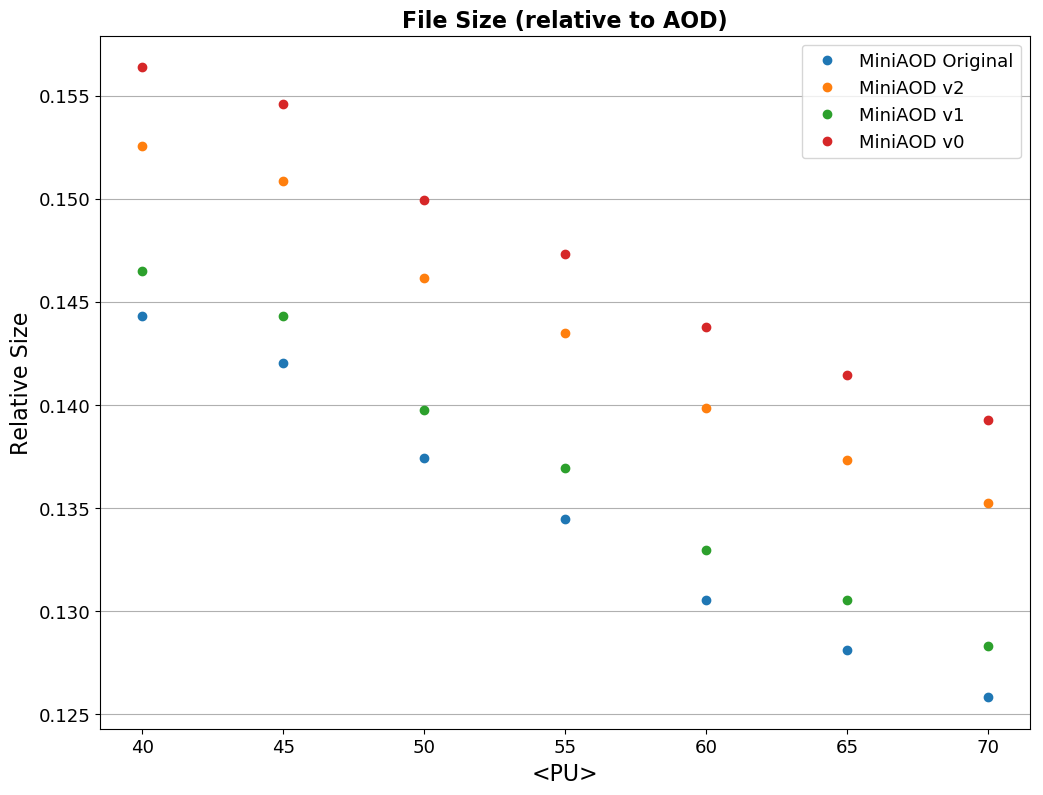

In [166]:
plt.plot(theData[cut2]["PU"].values,theData[cutoriginal]["file_size"].values/theData[cutA]["file_size"].values,"o",label="MiniAOD Original")
plt.plot(theData[cut2]["PU"].values,theData[cut2]["file_size"].values/theData[cutA]["file_size"].values,"o",label="MiniAOD v2")
plt.plot(theData[cut1]["PU"].values,theData[cut1]["file_size"].values/theData[cutA]["file_size"].values,"o",label="MiniAOD v1")
plt.plot(theData[cut0]["PU"].values,theData[cut0]["file_size"].values/theData[cutA]["file_size"].values,"o",label="MiniAOD v0")

plt.title("File Size (relative to AOD)",fontsize=16,fontweight="bold")

plt.legend(fontsize=13)

plt.xlabel("<PU>",fontsize=16)
plt.ylabel("Relative Size",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y")
ax = plt.gca()



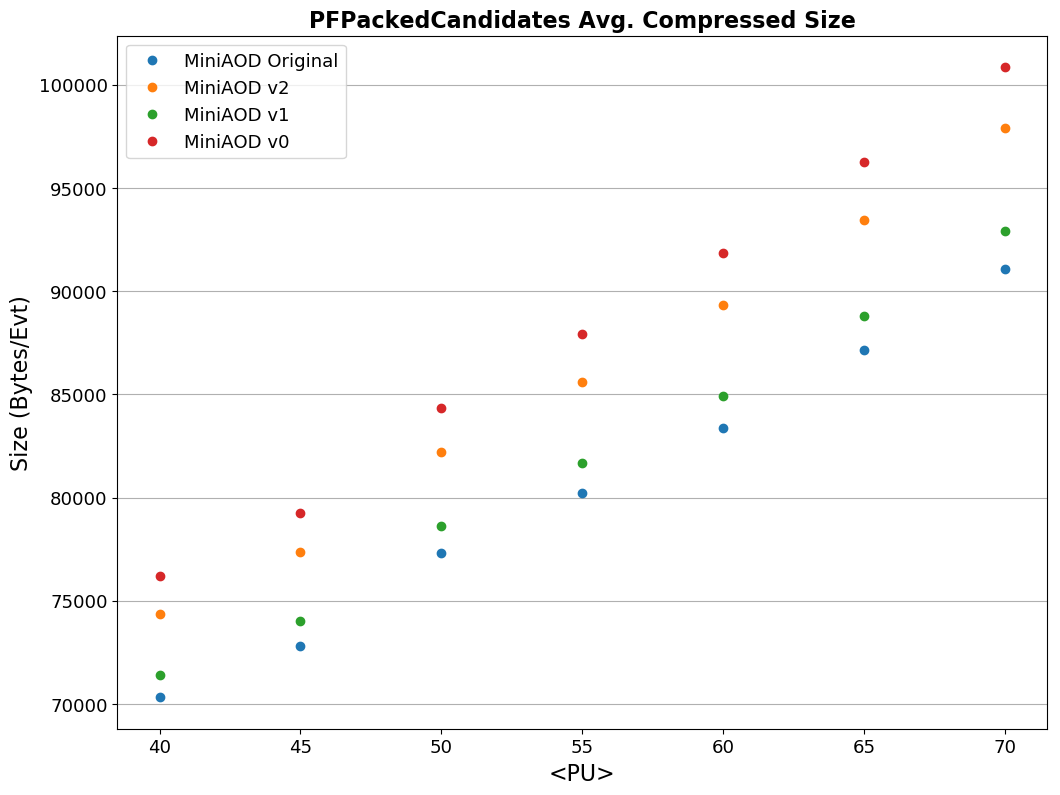

In [168]:
plt.plot(theData[cutoriginal]["PU"].values,theData[cutoriginal]["file_size"].values/theData[cutoriginal]["events"].values,"o",label="MiniAOD Original")
plt.plot(theData[cut2]["PU"].values,theData[cut2]["file_size"].values/theData[cut2]["events"].values,"o",label="MiniAOD v2")
plt.plot(theData[cut1]["PU"].values,theData[cut1]["file_size"].values/theData[cut1]["events"].values,"o",label="MiniAOD v1")
plt.plot(theData[cut0]["PU"].values,theData[cut0]["file_size"].values/theData[cut0]["events"].values,"o",label="MiniAOD v0")

plt.title("PFPackedCandidates Avg. Compressed Size",fontsize=16,fontweight="bold")

plt.legend(fontsize=13)

plt.xlabel("<PU>",fontsize=16)
plt.ylabel("Size (Bytes/Evt)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y")
ax = plt.gca()

